# ML Project: Building KMeans Clustering Algorithm  - Mahammad Basheer K S

---


**Project Name:** **Building KMeans Clustering Algorithm**

---

**Project done by:**    ***MAHAMMAD BASHEER K S**  

**Instructor's Name:**  ***MOHAMMED MARWAN RAMADAN SHAHIN***

**DATE:**    ***29-12-2023***

---

## KMeans Clustering

---



### Introduction

KMeans clustering is a popular unsupervised machine learning algorithm used for clustering similar data points into groups or clusters. It is a part of the partitioning clustering methods, where data points are divided into non-overlapping clusters.

### Algorithm Overview

1. **Initialization**: Randomly initialize K centroids to start the algorithm.

2. **Assign Points to Nearest Centroid**: Assign each data point to the nearest centroid based on some distance metric (often Euclidean distance).

3. **Update Centroids**: Calculate the new centroids as the mean of the data points assigned to each centroid.

4. **Repeat**: Repeat steps 2 and 3 until convergence (when centroids no longer change significantly) or for a specified number of iterations.

---

### Flow Chart

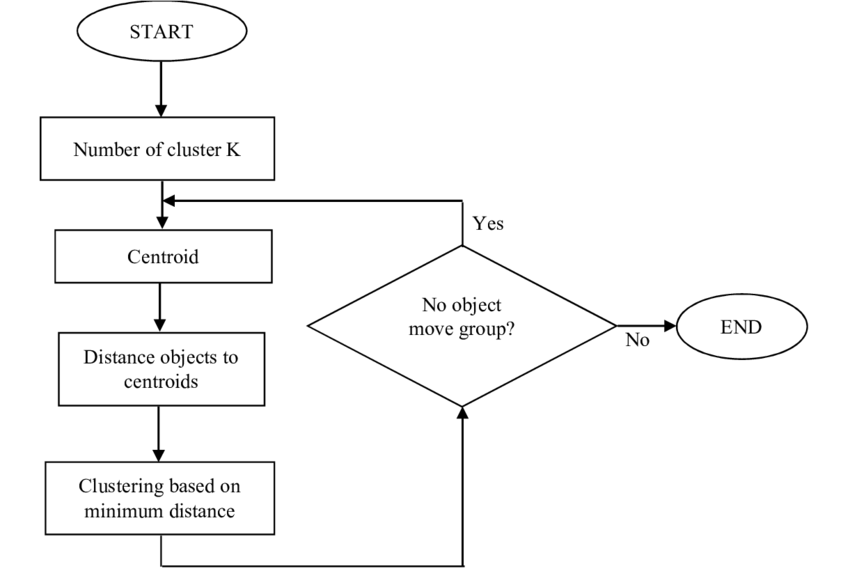

---

### Key Considerations

- **Number of Clusters (K)**: The number of clusters needs to be specified before running the algorithm. Choosing an appropriate K is often a critical step in the process and can be determined using various techniques like the elbow method or silhouette score.

- **Initialization Sensitivity**: KMeans clustering can be sensitive to the initial placement of centroids. Different initializations may lead to different clustering results.

- **Scalability**: KMeans can scale well to large datasets but may struggle with clusters of varying sizes and densities or non-globular shapes.

### Applications

- **Customer Segmentation**: Clustering customers based on their purchasing behavior to target marketing campaigns.

- **Image Compression**: Grouping similar colors in images to reduce the number of distinct colors while maintaining visual quality.

- **Anomaly Detection**: Identifying outliers or anomalies in data by considering data points in small clusters as potential anomalies.

### Conclusion

KMeans clustering is a powerful and widely used algorithm for partitioning data into clusters. It is relatively simple and computationally efficient, making it suitable for many real-world applications.

---


## Project Overview

In this project, I implemented the KMeans algorithm from scratch without using the sklearn library to predict cluster labels.

### Work Flow

1. **Class Creation**: I created a class to encapsulate our KMeans implementation.

2. **Constructor**: The class constructor initializes the KMeans algorithm with the given data.

3. **Eucledian Distance Method**: I implemented a method to calculate the Euclidean distance between two points.

4. **Distance Calculation Method**: Another method calculates the distance between each data point and the centroids using the Eucledian Distance Method.

5. **Fit Method**: The `fit` method performs the KMeans clustering algorithm with 100 iterations.

6. **Get Labels Method**: A method to retrieve the cluster labels assigned to each data point.

7. **Get Centroid Values Method**: Lastly, a method to obtain the centroid values after the clustering process.

---



---

### Limitations of Our Model

1. **Data Format**: The model expects the input data to be in a 2D-array format. It does not support other formats, such as Dataframe, 1D arrays or lists of lists.

2. **Fixed Number of Clusters**: The model is designed to work with only 3 clusters. It will always attempt to build 3 clusters, regardless of the dataset's characteristics. To handle a different number of clusters, the code needs to be modified.

3. **Manual Initialization of Centroids**: The initial centroid values are manually specified in the code. This may limit the model's adaptability to different datasets, as the initial centroids can significantly impact the clustering results.

4. **Limited Iterations**: The model is set to iterate a fixed number of times (100 iterations). Depending on the dataset and convergence criteria, this number may not be sufficient for optimal clustering, leading to potentially suboptimal results.

---


## Building the KMeans Algorithm

In this section, we will build the KMeans algorithm step by step. We will start by creating a class to encapsulate the algorithm and then proceed to implement the necessary methods for clustering.

Let's get started!


In [1]:
# Importing Necessary Libraries
import numpy as np  # NumPy for numerical computations
import pandas as pd  # Pandas for data manipulation
import random  # Random for generating random numbers
import math  # Math for mathematical functions


These libraries will be used to implement the K-means algorithm from scratch.

In [2]:
# Creating a class for KMeans clustering
class KMeans:
    
    #constructor
    def __init__(self,data):
        self.data=data
        
        #initialize centroids
        self.centroid_1=(10,5)
        self.centroid_2=(13,7)
        self.centroid_3=(20,15)
        
        #iteration
        self.n_iter=100
    
    # Creating the Method for eucledian distance calculation
    def eucledian(self,point1,point2):
        return math.sqrt((point2[0]-point1[0])**2+(point2[1]-point1[1])**2)
    
    # Creating the Method for calculating distance between each datapoints and centroids
    def distance(self,centroid):
        distance_centroid=np.array([])
        for i in self.data:
            dist=self.eucledian(i,centroid)
            distance_centroid=np.append(distance_centroid,dist)
        return distance_centroid
    
   
    
    # Creating the Method for fit/training
    
    def fit(self):
        # The loop for iteration(iterates as predefined, 100 times)
        for i in range(self.n_iter):
            distance_c1=self.distance(self.centroid_1) # Gives the distance from centroid_1 to each datapoints
            distance_c2=self.distance(self.centroid_2) # Gives the distance from centroid_2 to each datapoints
            distance_c3=self.distance(self.centroid_3) # Gives the distance from centroid_3 to each datapoints

            # find the centroid
            self.new_centroid=np.array([]) # Creating the empty array to store new_centroid values
            count_1,count_2,count_3=0,0,0 # initializing variables for counting
            
            # The loop iterates through each data point and calculates its distance to each centroid.
            # Then It assigns the data point to the centroid with the minimum distance
            for i in range(len(self.data)):
                min_dist=np.minimum(np.minimum(distance_c1[i],distance_c2[i]),distance_c3[i])
                if min_dist==distance_c1[i]:
                    self.new_centroid=np.append(self.new_centroid,1)
                    count_1+=1
                elif min_dist==distance_c2[i]:
                    self.new_centroid=np.append(self.new_centroid,2)
                    count_2+=1
                elif min_dist==distance_c3[i]:
                    self.new_centroid=np.append(self.new_centroid,3)
                    count_3+=1

            # Finding the centroid location
            sum1,sum2,sum3,sum11,sum22,sum33=0,0,0,0,0,0 # initializing variables for calculating the No. of each centroids
            c1,c2,c3,c11,c22,c33=0,0,0,0,0,0   # initializing variables for counting

            # The Loop will count the No.of centroids, and calculate the new centroid values
            for i in range(len(self.data)):
                if self.new_centroid[i]==1:
                    sum1+=self.data[i][0]
                    sum11+=self.data[i][1]
                    c1=sum1/count_1
                    c11=sum11/count_1
                elif self.new_centroid[i]==2:
                    sum2+=self.data[i][0]
                    sum22+=self.data[i][1]
                    c2=sum2/count_2
                    c22=sum22/count_2
                elif self.new_centroid[i]==3:
                    sum3+=self.data[i][0]
                    sum33+=self.data[i][1]
                    c3=sum3/count_3
                    c33=sum33/count_3

            # assigning values to centroids
            self.centroid_1=[c1,c11]
            self.centroid_2=[c2,c22]
            self.centroid_3=[c3,c33]
        print("\033[1;34mKMeans Model is Ready (K=3)\033[0m") # Display when Model is ready
        
        
    # Creating the Method to get labels
    def get_label(self):
        return self.new_centroid
    
    # Creating the Method to get centroid values
    def get_centroid(self):
        return self.centroid_1,self.centroid_2,self.centroid_3



Notes:
- Created a class `KMeans` for KMeans clustering.
- Implemented the constructor `__init__` to initialize the class with data and predefined centroids.
- Defined a method `euclidean` to calculate the Euclidean distance between two points.
- Implemented a method `distance` to calculate the distances between each data point and centroids.
- Created a method `fit` to train the KMeans model using the provided data and predefined centroids.
- Implemented methods `get_label` and `get_centroid` to retrieve the labels assigned to data points and the final centroid values after training.

This class can be used to perform KMeans clustering on a dataset with three centroids initialized at (10, 5), (13, 7), and (20, 15) respectively. The `fit` method trains the model using the specified number of iterations (100 in this case) and updates the centroids based on the data points' assignments. After training, the final centroids and labels can be obtained using the `get_centroid` and `get_label` methods.

Now that our KMeans model is ready, we can use it by creating an instance of the KMeans class and calling the fit method to train the model.

---

## Predicting the labels Using our Model

Here, we are using Mall_Cumstomers Dataset

In [3]:
# Load the Mall Customers dataset from a CSV file into a pandas DataFrame.
data = pd.read_csv('Mall_Customers.csv')

#Copying the data to future use
data_copy=data.iloc[:, 3:5]
data_copy_forsklearn=data.iloc[:, 3:5]

# Extract the columns representing annual income and spending score and convert them into a NumPy array.
data = data.iloc[:, 3:5].values  # Extracting the columns 3 and 4 as an array representing annual income and spending score.


Notes:

The code loads the Mall Customers dataset from a CSV file called 'Mall_Customers.csv' into a pandas DataFrame named data.  
It then extracts the columns representing annual income and spending score using .iloc[:, 3:5] and converts them into a NumPy array using .values.  
The resulting array contains the selected columns from the original dataset and can be used for further analysis or modeling.

In [4]:
# Create a KMeans clustering model using the provided data.
model_our = KMeans(data)

In [5]:
# Fit the KMeans clustering model to the data.
model_our.fit()

KMeans Model is Ready (K=3)


In [6]:
# Get the centroids of the clusters from the fitted KMeans model.
centroid=model_our.get_centroid()
centroid

([87.0, 18.63157894736842],
 [44.15447154471545, 49.829268292682926],
 [86.53846153846153, 82.12820512820512])

The `model.get_centroid()` method retrieves the three centroid values from the KMeans model that we built from scratch.

In [7]:
# Get the labels assigned to each data point by the fitted KMeans model.
label=model_our.get_label()
label

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 1., 3., 1., 3., 1., 3., 1., 3., 1., 3., 1., 3.,
       1., 3., 1., 3., 1., 3., 1., 3., 1., 3., 1., 3., 1., 3., 1., 3., 1.,
       3., 1., 3., 1., 3., 1., 3., 1., 3., 1., 3., 1., 3., 1., 3., 1., 3.,
       1., 3., 1., 3., 1., 3., 1., 3., 1., 3., 1., 3., 1., 3., 1., 3., 1.,
       3., 1., 3., 1., 3., 1., 3., 1., 3., 1., 3., 1., 3.])

The `model.get_label()` method returns the predicted labels assigned to each data point by the KMeans model that we built from scratch.

## Visualize The Model Result

In [8]:
# Display the first few rows of the data_copy DataFrame.
data_copy.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [9]:
# Assign the cluster labels to a new column named 'clusters' in the data_copy DataFrame.
data_copy['clusters_our'] = label

In [10]:
# Display the first few rows of the data_copy DataFrame after assign the cluster column.
data_copy.head()

,Annual Income (k$),Spending Score (1-100),clusters_our
0,15,39,2.0
1,15,81,2.0
2,16,6,2.0
3,16,77,2.0
4,17,40,2.0


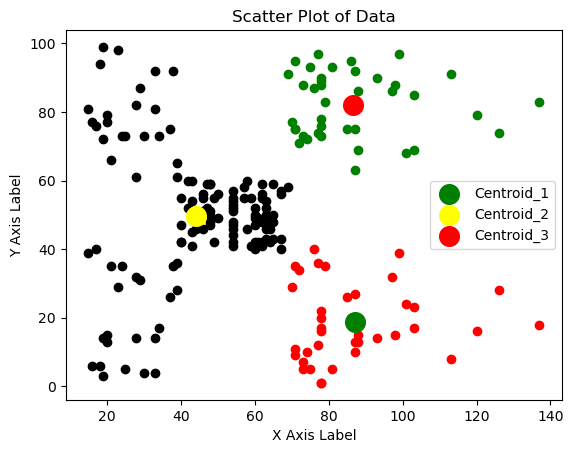

In [11]:
# Lets Display the Model result
import matplotlib.pyplot as plt


# Create scatter plot
plt.scatter(data_copy[data_copy['clusters_our']==1].values[:,0],data_copy[data_copy['clusters_our']==1].values[:,1],c='red')
plt.scatter(data_copy[data_copy['clusters_our']==2].values[:,0],data_copy[data_copy['clusters_our']==2].values[:,1],c='black')
plt.scatter(data_copy[data_copy['clusters_our']==3].values[:,0],data_copy[data_copy['clusters_our']==3].values[:,1],c='green')
plt.scatter(centroid[0][0],centroid[0][1],c='green',s=200,label='Centroid_1')
plt.scatter(centroid[1][0],centroid[1][1],c='yellow',s=200,label='Centroid_2')
plt.scatter(centroid[2][0],centroid[2][1],c='red',s=200,label='Centroid_3')
# Set plot title and labels
plt.title('Scatter Plot of Data')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.legend()

# Display the plot
plt.show()

## Model: KMeans - using sklearn

Now, we will build a KMeans clustering model for the same dataset using the sklearn library to compare the results with our custom-built model.

In [12]:
#importing Libraries
# KMeans is the name of our Model class, so here we are renaming the sklearn model as 'KM'
from sklearn.cluster import KMeans as KM    # Renamed as 'KM'

import warnings
warnings.filterwarnings('ignore')

In [13]:
# lets display the copied dataset for sklearn

data_copy_forsklearn.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [14]:
# Building the Model using sklearn for 3 clusters
model_sklearn=KM(n_clusters=3)

In [15]:
model_sklearn.fit(data_copy_forsklearn)

KMeans(n_clusters=3)

In [16]:
# Predicted labels from sklearn model
model_sklearn.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [17]:
# cluster values for sklearn model
model_sklearn.cluster_centers_

array([[44.15447154, 49.82926829],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513]])

In [18]:
# adding the label (predicted from sklearn model) column to dataset
data_copy['Clusters_sklearn']=model_sklearn.labels_

In [19]:
# display the dataset
data_copy

,Annual Income (k$),Spending Score (1-100),clusters_our,Clusters_sklearn
0,15,39,2.0,0
1,15,81,2.0,0
2,16,6,2.0,0
3,16,77,2.0,0
4,17,40,2.0,0
...,...,...,...,...
195,120,79,3.0,2
196,126,28,1.0,1
197,126,74,3.0,2
198,137,18,1.0,1


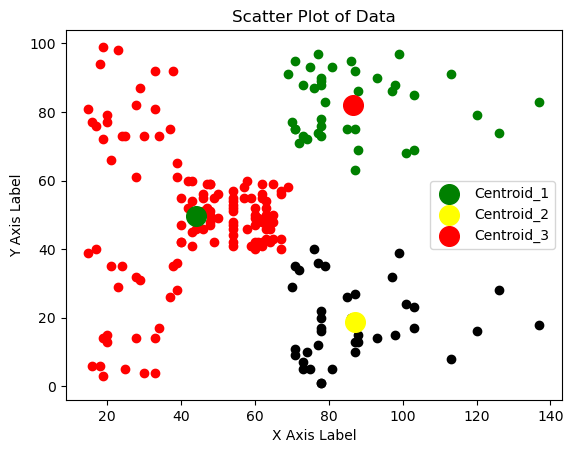

In [20]:
# Create scatter plot fro sklearn model result
plt.scatter(data_copy[data_copy['Clusters_sklearn']==0].values[:,0],data_copy[data_copy['Clusters_sklearn']==0].values[:,1],c='red')
plt.scatter(data_copy[data_copy['Clusters_sklearn']==1].values[:,0],data_copy[data_copy['Clusters_sklearn']==1].values[:,1],c='black')
plt.scatter(data_copy[data_copy['Clusters_sklearn']==2].values[:,0],data_copy[data_copy['Clusters_sklearn']==2].values[:,1],c='green')
plt.scatter(model_sklearn.cluster_centers_[0,0],model_sklearn.cluster_centers_[0,1],c='green',s=200,label='Centroid_1')
plt.scatter(model_sklearn.cluster_centers_[1,0],model_sklearn.cluster_centers_[1,1],c='yellow',s=200,label='Centroid_2')
plt.scatter(model_sklearn.cluster_centers_[2,0],model_sklearn.cluster_centers_[2,1],c='red',s=200,label='Centroid_3')
# Set plot title and labels
plt.title('Scatter Plot of Data')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.legend()

# Display the plot
plt.show()

By observing the scatter plot above, we can conclude that the predictions obtained using our custom KMeans model and the KMeans model from the sklearn library are the same. This suggests that both models are effectively clustering the data in a similar manner.


---

## Conclusion

In this project, we successfully implemented a KMeans clustering algorithm from scratch and compared its results with the KMeans model provided by the sklearn library. After loading the dataset and extracting relevant features, we created our custom KMeans model, fitted it to the data, and visualized the clustering results using a scatter plot.

Upon comparing the predictions of our custom model with those of the sklearn model, we observed that both models produced identical clustering results. This indicates that our custom KMeans implementation is consistent with the established KMeans algorithm provided by sklearn.

Overall, this project demonstrates a successful implementation of the KMeans clustering algorithm from scratch, showcasing its effectiveness in clustering a real-world dataset. This exercise not only deepened our understanding of the KMeans algorithm but also provided valuable insights into how clustering algorithms can be implemented and compared using Python.

---

## Thanks Message

Special thanks to our instructor, **Mohammed Marwan Ramadan Shahin** sir, for providing guidance and support throughout this course. His expertise and insights have been invaluable in helping us understand and implement the KMeans clustering algorithm effectively.


---
#### *** End ***